In [155]:
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim  #최적화 사용
from torch.utils.data import DataLoader, random_split
import time
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# part1시작: 데이터 불러오기

In [156]:
# 파일 압축 해제
#import shutil

# filename = 'train-20230715T133713Z-001.zip'
# extract_dir = 'train'
# archive_format = "zip"

# shutil.unpack_archive(filename, extract_dir, archive_format)

In [157]:
# 이미지 변환
# 이리저리 바꿔보면서 좋은 성능이 나오도록 하시면 됩니다.
# 다만 validation은 건들지 말아주세요

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((300, 300)),
        transforms.RandomCrop(224),
        transforms.RandomHorizontalFlip(p=0.5),  #좌우반전
        #transforms.RandomVerticalFlip(p=0.5),  #상하반전
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        #transforms.RandomRotation(degrees=45)  #회전
    ]),
    
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [158]:
# 데이터셋이 위치한 경로
# 여러분들이 다운로드 받은 데이터셋의 경로를 찍어주시면 됩니다.
data_dir = 'train'

In [159]:
# 여기는 건들지 말아주세요!

# 이미지 데이터셋 불러오기
full_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'),
                                          data_transforms['train'])

# 클래스명
class_names = full_dataset.classes

In [160]:
full_dataset

Dataset ImageFolder
    Number of datapoints: 10597
    Root location: train/train
    StandardTransform
Transform: Compose(
               Resize(size=(300, 300), interpolation=bilinear, max_size=None, antialias=None)
               RandomCrop(size=(224, 224), padding=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [161]:
def gfx(x):
    # PyTorch에서 기울기 계산을 위해 필요한 연산들을 수행합니다.
    input_tensor = torch.tensor(full_dataset, requires_grad=True)  # numpy 배열을 PyTorch 텐서로 변환
    output = model(input_tensor)  # 모델의 출력 계산
    loss = torch.sum(output)  # 예시로 간단하게 출력값들의 합을 손실 함수로 설정합니다.
    loss.backward()  # 손실 함수의 기울기 계산
    gradient = input_tensor.grad.numpy()  # 텐서의 기울기를 numpy 배열로 변환하여 반환
    return gradient

In [162]:
import numpy as np
from PIL import Image
import torch
import torchvision.transforms as transforms

# 이미지와 어노테이션 가져오기
img_path, label = full_dataset.samples[0]
img = Image.open(img_path)

# 데이터 형식 확인
print(type(img))

# 데이터 형식 변환 (예시)
if isinstance(img, Image.Image):
    # 이미지를 NumPy 배열로 변환
    annot = np.array(img)

elif isinstance(img, torch.Tensor):
    # 텐서 형식으로 변환
    annot = img.numpy()

# 변환된 데이터 형식 확인
print(type(annot))

# 시각화 예시
# Define the transformations
color_aug = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(p=0.5),  #좌우반전
    transforms.RandomVerticalFlip(p=0.5),  #상하반전
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    transforms.RandomRotation(degrees=45)  #회전
])

#Apply transformations to the image
transformed_image = color_aug(img)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>


In [163]:
# 이미지와 어노테이션 가져오기
img_path, label = full_dataset.samples[0]
img = Image.open(img_path)

# 데이터 형식 확인
print(type(img))

# 데이터 형식 변환 (예시)
if isinstance(img, Image.Image):
    #이미지를 numpy 배열로 전환
    annot = np.array(img)
    
elif isinstance(img, torch.Tensor):
    #텐서 형식으로 변환
    annot = img.numpy()
    
# 변환된 데이터 형식 확인
print(type(annot))

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>


In [164]:
print(transformed_image)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


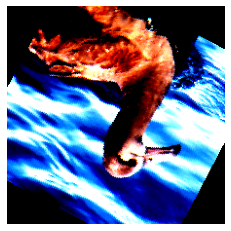

In [165]:
# Convert thr tensor image to a numpy array
np_image = transformed_image.permute(1,2,0).numpy()

# Display the RGB image
plt.imshow(np_image)
plt.axis('off')
plt.show()

In [166]:
#pip install albumentations

# 시각화 예시 - 좌우반전

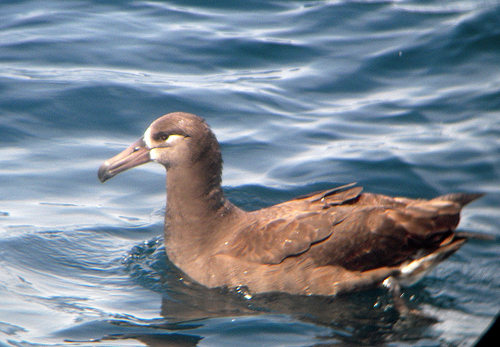

In [167]:
transform = transforms.Compose([transforms.RandomHorizontalFlip(p=0.9)])
tensor_img = transform(img)
tensor_img

# 시각화 예시 - 랜덤 회전

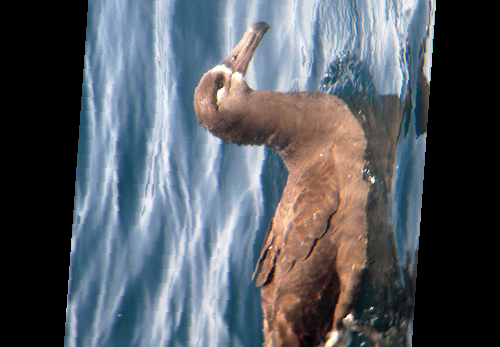

In [168]:
transform = transforms.Compose([transforms.RandomRotation(degrees =180)])
tensor_img = transform(img)
tensor_img

# 시각화 예시 - 대비

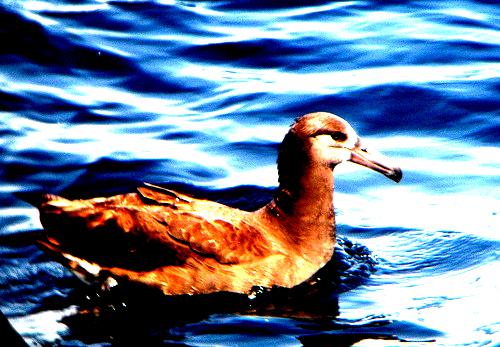

In [169]:
new_img = transforms.functional.adjust_contrast(img, contrast_factor=3.8)
new_img

# 모델 학습

In [170]:
# 데이터셋을 train과 valid로 나누기
train_size = int(0.7 * len(full_dataset))
valid_size = len(full_dataset) - train_size
train_dataset, valid_dataset = random_split(full_dataset, [train_size, valid_size])

# 데이터 로더
# 만약 CUDA out of Memory가 뜬다면
# 1. batch_size를 줄이거나,
# 2. 모델을 가벼운 걸로 바꾸거나
# 3. data_transforms 에서 Resize 부분을 작게해서 이미지 사이즈를 줄여주세요.
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
valid_loader = DataLoader(valid_dataset, batch_size=128, shuffle=False, num_workers=2)

In [171]:
# GPU 사용 가능 확인
# device(type='cuda', index=0) 가 뜬다면 GPU에서 훈련이 가능해지고 더 빨라집니다.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

# 여기는 수정

In [172]:
# pretrained 모델 불러오기
# 여러분이 원하는 모델을 여기서 설정해주세요
model = models.resnet50(pretrained=True)

# 새로운 분류기를 마지막 레이어에 추가
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))

# 모델 GPU에 올리기
model = model.to(device)

# Adam은 그대로 사용


In [173]:

# Adam Optimizer 함수 정의
def adam_optimizer(w, m, v, learning_rate, gradient, beta1, beta2, epsilon):
    m = beta1 * m + (1 - beta1) * gradient
    v = beta2 * v + (1 - beta2) * (gradient**2)
    m_hat = m / (1 - beta1)
    v_hat = v / (1 - beta2)
    w_new = w - learning_rate * (m_hat / (np.sqrt(v_hat) + epsilon))
    return w_new, m, v

# Adam Optimizer 사용 예시
num_epochs = 100
learning_rate = 0.001
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
w = np.random.randn(2)  # 가중치 초기화
m = np.zeros(2)  # 이동 평균 초기화
v = np.zeros(2)  # 이동 평균 제곱 초기화

for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Move data to the device (e.g., GPU) if available
        images = images.to(device)
        labels = labels.to(device)

        # Zero out the gradients to avoid accumulating them in each iteration
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Compute the loss based on the model's outputs and the ground-truth labels.
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update the model's parameters using the optimizer (compute_gradient is handled by optimizer.step()).
        optimizer.step()

# for epoch in range(num_epochs):
#     for x, y in zip(inputs, labels):
#         gradient = gfx(x, y, w)  # 기울기 계산
#         w, m, v = adam_optimizer(w, m, v, learning_rate, gradient, beta1, beta2, epsilon) 

#  learning scheduler도 바꿔주기

In [174]:
# 손실 함수와 optimizer 설정
# optimizer도 다양하게 바꿔가면서 해보시면 좋습니다. 특히 lr (학습률) 관련해서 잘 설정해주세요
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# scheduler 설정
# torch.optim.lr_scheduler에 보면 다양한 scheduler가 존재합니다. 한번 확인해보고 다양하게 시도해보세요
step_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# epoch 횟수 설정
num_epochs=5

# 모델 학습과 평가

In [175]:
# 모델 학습과 평가
# 이 부분은 건드셔도 되고 안건드셔도 됩니다.
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch+1, num_epochs))
    print('-' * 10)
    for phase in ['train', 'valid']:
        if phase == 'train':
            dataloader = train_loader
            model.train()
        else:
            dataloader = valid_loader
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in tqdm(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        if phase == 'train':
            step_lr_scheduler.step()
        epoch_loss = running_loss / len(dataloader.dataset)
        epoch_acc = running_corrects.double() / len(dataloader.dataset)
        
        print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
    print('Training complete')

Epoch 1/5
----------


100% 58/58 [00:30<00:00,  1.90it/s]


train Loss: 3.9426 Acc: 0.1312


100% 25/25 [00:10<00:00,  2.39it/s]


valid Loss: 3.5369 Acc: 0.1742
Training complete
Epoch 2/5
----------


100% 58/58 [00:30<00:00,  1.89it/s]


train Loss: 2.4125 Acc: 0.3530


100% 25/25 [00:10<00:00,  2.39it/s]


valid Loss: 2.8602 Acc: 0.2890
Training complete
Epoch 3/5
----------


100% 58/58 [00:30<00:00,  1.89it/s]


train Loss: 1.7931 Acc: 0.4912


100% 25/25 [00:10<00:00,  2.37it/s]


valid Loss: 2.2357 Acc: 0.4289
Training complete
Epoch 4/5
----------


100% 58/58 [00:30<00:00,  1.89it/s]


train Loss: 1.4410 Acc: 0.5815


100% 25/25 [00:10<00:00,  2.37it/s]


valid Loss: 2.1490 Acc: 0.4362
Training complete
Epoch 5/5
----------


100% 58/58 [00:30<00:00,  1.89it/s]


train Loss: 1.1965 Acc: 0.6431


100% 25/25 [00:10<00:00,  2.39it/s]

valid Loss: 1.9298 Acc: 0.4981
Training complete
